# Modeling Complex Relationships

<img src='https://miro.medium.com/max/463/1*8C39nYB1NGDxJ5eWk5lHAw.jpeg' width=500 />


## Polynomial Regression

<img src='imgs/noisy-sine-third-order-polynomial.png' width=500 />


>Polynomial features are useful because they will things in your features that can help scale it.

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

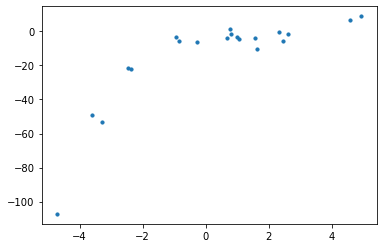

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

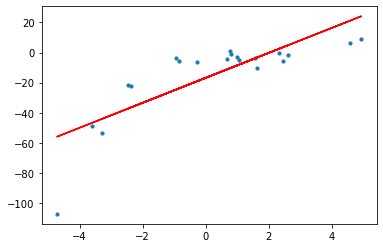

In [2]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

***To overcome under-fitting, we need to increase the complexity of the model.***

To generate a higher order equation we can add powers of the original features as new features. 

The linear model,

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i
\end{equation}



can be transformed to


\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\beta}_2 X_i^2 + \hat{\epsilon}_i
\end{equation}

*This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.*

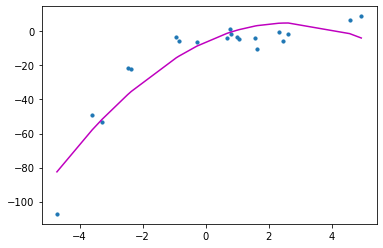

In [3]:

import operator


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


In [4]:
model.coef_

array([[ 0.        ,  8.48492679, -1.62853134]])

>The big positive will be overcome eventually because the second coefficient is squared. 

In [5]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


26.367158752430782
0.007386294302002994


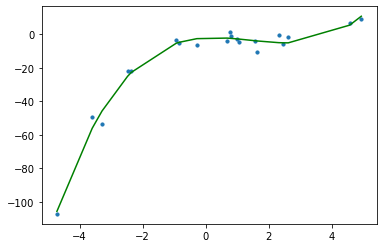

In [6]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features3= PolynomialFeatures(degree=3)
x_poly3 = polynomial_features3.fit_transform(x)

model3 = LinearRegression()
model3.fit(x_poly3, y)
y_poly_pred3 = model3.predict(x_poly3)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip3 = sorted(zip(x,y_poly_pred3), key=sort_axis)
x, y_poly_pred3 = zip(*sorted_zip3)
plt.plot(x, y_poly_pred3, color='g')
plt.show()

Based on the curves you would do n+1

>When we add polynomials is reduces the ability to make inferences from your model. The more complex you make the model, the less you are able to interpret coefficients. It is exaggerating the features in the model. In order to model the relationship we need multiple terms. It will have different effect of where y is based on x

>In a model where all we have is x2, you won't get a curve, you are trying to capture the relationship because it looks exponential. 

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**, what do you think is the relationship between temperature and Citibike rentals?

Is that relationship alwasy consistent? Will the relationship between be the same if it is raining?

<img src="imgs/interactions.png" style="width:600px;">

Adding interaction terms to a regression model can greatly expand understanding of the relationships among the variables in the model and allows more hypotheses to be tested.




\begin{equation}
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_i ++ \hat{\beta}_2 X_j+ \hat{\beta}_3 X_iX_j + \hat{\epsilon}
\end{equation}


>y is product of intercept times coefficient for interaction of xi and xj(multiply the two by eachother). When it's raining it's beta1 + beta3. Too much is too much.

By additing an interaction term we can now account for this differing effects of a feature based on different values of another feature. However, adding an interaction term to a model drastically changes the interpretation of all the coefficients. 

## Doing it in code

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('cleaned_movie_data.csv',index_col=0)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,years_old
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,936.0,7.9,PG-13,0,0,1,0,0,0,7
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,5000.0,7.1,PG-13,0,0,1,0,0,1,9
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,...,23000.0,8.5,PG-13,0,0,1,0,0,0,4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,...,632.0,6.6,PG-13,0,0,1,0,0,0,4
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,...,11000.0,6.2,PG-13,0,0,1,0,0,0,9


In [9]:
features=['budget', 'duration','actor_1_facebook_likes','cast_total_facebook_likes','G', 'PG', 'PG-13', 'R',
       'years_old']

In [10]:
df_features = df[features]
target = df['gross']

In [11]:
df_features.describe()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG,PG-13,R,years_old
count,3.142000e+03,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,4.098620e+07,109.173512,8150.281349,12207.888924,0.023552,0.159134,0.369828,0.447486,12.396244
std,4.300100e+07,21.678752,16568.236742,20213.090981,0.151672,0.365860,0.482835,0.497314,8.629479
min,1.100000e+03,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+07,95.000000,818.000000,2241.500000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,2.600000e+07,105.000000,2000.000000,4481.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,5.407611e+07,119.000000,13000.000000,16705.750000,0.000000,0.000000,1.000000,1.000000,17.000000
max,3.000000e+08,330.000000,640000.000000,656730.000000,1.000000,1.000000,1.000000,1.000000,80.000000


### Create a polynomial feature 

`df['budget^2'] = df['budget']**2`

### Create a interaction feature

`df['budget_R'] = df['budget']*df['R']`

### Use SKlearn to create features

In [14]:
df_features.dropna(subset=['duration'],inplace=True)

<ipython-input-14-53e27e0e9f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(subset=['duration'],inplace=True)


>Drop from dataframe then create features and target!!

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

>This will also create an interaction variable. Set bias as False

In [16]:
poly_data = poly.fit_transform(df_features)

poly_data

array([[2.37000000e+08, 1.78000000e+02, 1.00000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 4.90000000e+01],
       [3.00000000e+08, 1.69000000e+02, 4.00000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 8.10000000e+01],
       [2.50000000e+08, 1.64000000e+02, 2.70000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.60000000e+01],
       ...,
       [7.00000000e+03, 8.10000000e+01, 1.21000000e+02, ...,
        1.00000000e+00, 2.40000000e+01, 5.76000000e+02],
       [5.36810484e+07, 1.00000000e+02, 9.46000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.60000000e+01],
       [1.10000000e+03, 9.00000000e+01, 8.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.44000000e+02]])

In [17]:
len(df_features.columns)

poly_columns = poly.get_feature_names(df_features.columns)

In [18]:
len(poly_columns)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

df_poly.head()

,budget,duration,actor_1_facebook_likes,cast_total_facebook_likes,G,PG,PG-13,R,years_old,budget^2,...,PG^2,PG PG-13,PG R,PG years_old,PG-13^2,PG-13 R,PG-13 years_old,R^2,R years_old,years_old^2
0,237000000.0,178.0,1000.0,4834.0,0.0,0.0,1.0,0.0,7.0,5.616900e+16,...,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,49.0
1,300000000.0,169.0,40000.0,48350.0,0.0,0.0,1.0,0.0,9.0,9.000000e+16,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,81.0
2,250000000.0,164.0,27000.0,106759.0,0.0,0.0,1.0,0.0,4.0,6.250000e+16,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
3,263700000.0,132.0,640.0,1873.0,0.0,0.0,1.0,0.0,4.0,6.953769e+16,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,16.0
4,258000000.0,156.0,24000.0,46055.0,0.0,0.0,1.0,0.0,9.0,6.656400e+16,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,81.0
